<a href="https://colab.research.google.com/github/Aly-Habib/MNIST-classification-using-CNN-or-RNN/blob/main/MNIST_classification_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Importing all needed libaries



In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, CuDNNLSTM 

Load data from MNIST

In [ ]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Normalize data

In [ ]:
xtrain = xtrain / 255.0
xtest = xtest / 255.0

The dataset info

In [ ]:
print("The number of training images: " + str(xtrain.shape[0]))
print("The shape of the training images: " + str(xtrain[0].shape))

The number of training images: 60000
The shape of the training images: (28, 28)


The model

In [ ]:
model = Sequential()

#The first layer
#model.add(LSTM(128, input_shape=(xtrain[0].shape), activation="relu", return_sequences=True))
model.add(CuDNNLSTM(128, input_shape=(xtrain[0].shape), return_sequences=True))
model.add(Dropout(0.2))

#The second layer
#model.add(LSTM(128, activation="relu"))
model.add(CuDNNLSTM(128))
model.add(Dropout(0.2))

#The third layer
model.add(Dense(32 ,activation="relu"))
model.add(Dropout(0.2))

#The last layer 
model.add(Dense(10, activation="softmax"))

opt = keras.optimizers.Adam(learning_rate=0.001, decay=1e-5)

model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

hist = model.fit(xtrain, ytrain, validation_data=(xtest, ytest), epochs=4)

Epoch 1/4
1875/1875 [==============================] - 48s 23ms/step - loss: 0.4159 - accuracy: 0.8720 - val_loss: 0.1370 - val_accuracy: 0.9589
Epoch 2/4
1875/1875 [==============================] - 43s 23ms/step - loss: 0.1247 - accuracy: 0.9668 - val_loss: 0.0831 - val_accuracy: 0.9760
Epoch 3/4
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0857 - accuracy: 0.9769 - val_loss: 0.0741 - val_accuracy: 0.9772
Epoch 4/4
1875/1875 [==============================] - 43s 23ms/step - loss: 0.0675 - accuracy: 0.9823 - val_loss: 0.0523 - val_accuracy: 0.9859


In [ ]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


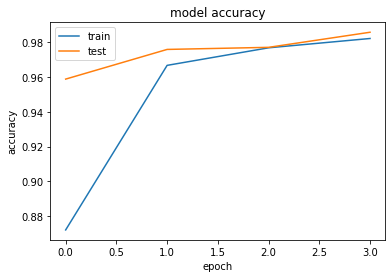

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

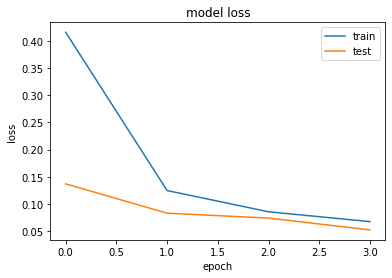

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()